## Perceptron Algorithm Quiz

In [1]:
# For a point with coordinates
# (p,q), label y, and prediction given by the equation y_cap = step(w1x1 + w2x2 + b) 

# * If the point is correctly classified, do nothing.

# * If the point is classified positive, but it has a negative label, subtract
# αp,αq, and α
# from w1, w2 and b respectively.

# * If the point is classified negative, but it has a positive label, add
# αp,αq,and α to
# w1, w2 and b respectively.

# Then click on test run to graph the solution that the perceptron algorithm gives you. 
# It'll actually draw a set of dotted lines, that show how the algorithm approaches to the best solution, 
# given by the black solid line.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

columns=['x1','x2','y']
train_data=pd.read_csv("../Datasets/perceptron_data.csv", header=None, names=columns)
X=np.array(train_data.iloc[:,:-1])
y=np.array(train_data.iloc[:,-1])

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        pred = prediction(X[i],W,b)
        if y[i]-pred == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-pred == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

def trainPerceptronAlgorithm(X, y, learn_rate = 0.1, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return W,b

([-0.5, 1.5], [array([0.93090905]), array([-0.08264549])])


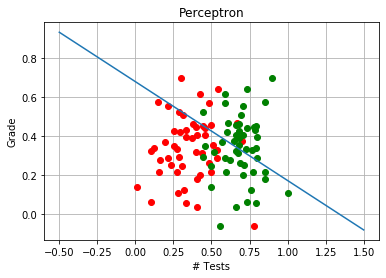

In [11]:
def getY(slope, intercept,x):
    return (slope * x + intercept)

def getPerceptronLine(w1,w2,b):
    slope = -(b / w2) / (b / w1)
    intercept = -b / w2
    xx = [-0.5,1.5]
    yy = [getY(slope,intercept,-0.5),getY(slope,intercept,1.5)]
    return xx,yy

result = trainPerceptronAlgorithm(X,y)
line = getPerceptronLine(result[0][0],result[0][1],result[1])
xes = X[:,:1].reshape(-1)
yes = X[:,1:].reshape(-1)
cnt = sum(i < 1 for i in y.reshape(-1))

plt.plot(xes[:cnt],yes[:cnt], 'ro')
plt.plot(xes[cnt:],yes[:cnt], 'go')
plt.plot(line[0],line[1])

plt.xlabel('# Tests')
plt.ylabel('Grade')

plt.title('Perceptron')

plt.grid(True)

plt.show()